In [45]:
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization.bloch import Bloch
import numpy as np
import math as m
import seaborn as sns
import imageio
pi = np.pi

def Rx(theta,state):
  rotation_matrix = np.array([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])
  return np.dot(rotation_matrix, state)

  
def Ry(theta, state):
  rotation_matrix = np.array([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])
  return np.dot(rotation_matrix, state)
  
def Rz(theta,state):
  rotation_matrix =  np.array([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])
  return np.dot(rotation_matrix, state)


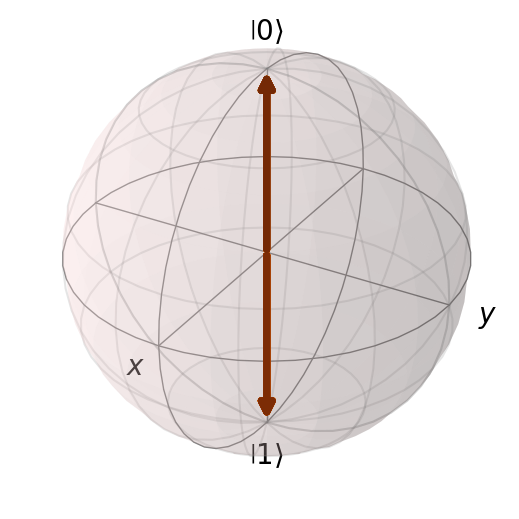

In [60]:
phi = 0.2
N = 25
palette = sns.color_palette("YlOrBr", len(state_list))

state_list = []
state = np.array([0,0,1])
state_list.append(state)
# state = Ry(pi/2,state)
# state_list.append(state)

for i in range(N):
    state = Rz(-phi*i,state)
    state = Rx(pi,state)
    state = Rz(phi*i,state)

    state_list.append(state)

    state = Rz(-phi*i-phi/2,state)
    state = Rx(pi,state)
    state = Rz(phi*i+phi/2,state)
    state_list.append(state)

state = Rz(-N*phi,state)
state_list.append(state)

# state = Ry(-pi/2,state)
# state_list.append(state)

_bloch = Bloch()



_bloch.vector_color = palette
_bloch.add_vectors(state_list)
_bloch.render()


In [61]:
path = 'spec_exp_visualization/frames_szsz_basis/'
for i in range(len(state_list)):
    _bloch.clear()
    _bloch.vector_color = palette[i:i+1]
    _bloch.add_vectors(state_list[i:i+1])
    _bloch.save(path + 'frame%d.png' %(i))


In [65]:
frames = []
for t in range(len(state_list)):
    image = imageio.v2.imread(f'spec_exp_visualization/frames_szsz_basis/frame{t}.png')
    frames.append(image)

In [66]:
imageio.mimsave(path + 'spec_expt.gif', # output gif
                frames,          # array of input frames
                duration = 100)     